In [5]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
pd.set_option('display.max_row',None)

In [6]:
Tt = pd.read_excel(r"titanic3.xls")

In [7]:
Tt.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
Tt.shape

(1309, 14)

In [9]:
Tt.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [11]:
Columns_to_drop = Tt.columns[Tt.isnull().sum()*100 / Tt.shape[0] > 40]
print('\n-----DROPPED COLUMNS-----\n',Columns_to_drop)


-----DROPPED COLUMNS-----
 Index(['cabin', 'boat', 'body', 'home.dest'], dtype='object')


In [13]:
Tt = Tt.drop(columns=['cabin', 'boat', 'body', 'home.dest', 'name'])

In [14]:
Tt.shape

(1309, 9)

In [16]:
#Check unique values
# Select only object columns
object_columns = Tt.select_dtypes(include=['object'])

# Check for non-numeric values in each object column and display unique symbols
for column in object_columns:
    non_numeric_values = Tt[column].str.extract(r'([^\d])', expand=False).dropna().unique()
    if len(non_numeric_values) > 0:
        print(f"Unique non-numeric symbols found in column '{column}':")
        print(non_numeric_values)

Unique non-numeric symbols found in column 'sex':
['f' 'm']
Unique non-numeric symbols found in column 'ticket':
['P' 'W' 'F' 'C' 'S' 'A' 'L']
Unique non-numeric symbols found in column 'embarked':
['S' 'C' 'Q']


In [17]:
Tt.age = Tt.age.fillna(Tt.age.mean())
Tt.fare = Tt.fare.fillna(Tt.fare.mean())
Tt.embarked = Tt.embarked.fillna(Tt.embarked.mode()[0])

In [18]:
Tt.embarked.mode()

0    S
Name: embarked, dtype: object

In [20]:
Tt.embarked.value_counts()

S    916
C    270
Q    123
Name: embarked, dtype: int64

In [21]:
Tt.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
object_columns = Tt.select_dtypes(include=['object']).columns
Tt[object_columns] = Tt[object_columns].astype(str)

Tt[Tt.select_dtypes(include=['object']).columns] = Tt[Tt.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [24]:
Tt.corr()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked
pclass,1.000000,-0.312469,0.124617,-0.366370,0.060832,0.018322,0.309695,-0.558477,0.185479
survived,-0.312469,1.000000,-0.528693,-0.050199,-0.027825,0.082660,-0.125869,0.244208,-0.175313
sex,0.124617,-0.528693,1.000000,0.057398,-0.109609,-0.213125,0.024725,-0.185484,0.097960
age,-0.366370,-0.050199,0.057398,1.000000,-0.190747,-0.130872,-0.085080,0.171521,-0.071181
sibsp,0.060832,-0.027825,-0.109609,-0.190747,1.000000,0.373587,0.063921,0.160224,0.065567
parch,0.018322,0.082660,-0.213125,-0.130872,0.373587,1.000000,0.053389,0.221522,0.044772
ticket,0.309695,-0.125869,0.024725,-0.085080,0.063921,0.053389,1.000000,-0.014735,0.031453
fare,-0.558477,0.244208,-0.185484,0.171521,0.160224,0.221522,-0.014735,1.000000,-0.237970
embarked,0.185479,-0.175313,0.097960,-0.071181,0.065567,0.044772,0.031453,-0.237970,1.000000


In [25]:
#Rearrange the columns
Tt = Tt[['survived', 'pclass', 'sex', 'age', 'sibsp',  'parch', 'ticket', 'fare', 'embarked']]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
Tt_train, Tt_test = train_test_split(Tt,test_size=.2)

In [28]:
Tt_train.head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,embarked
690,0,3,1,22.000000,0,0,554,7.7958,2
199,1,1,0,24.000000,0,0,796,49.5042,0
134,1,1,0,29.881135,1,0,108,89.1042,0
1053,0,3,1,29.881135,0,0,246,7.2292,0
164,1,1,1,35.000000,0,0,12,26.5500,0


In [29]:
Tt_test.head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,embarked
1240,1,3,1,0.4167,0,1,233,8.5167,0
1226,0,3,1,19.0000,0,0,488,7.8958,2
72,1,1,0,26.0000,1,0,94,136.7792,0
328,0,2,1,34.0000,1,0,142,26.0000,2
1264,0,3,1,40.5000,0,2,736,14.5000,2


In [34]:
Tt_train_x = Tt_train.iloc[:,1::]
Tt_train_y = Tt_train.iloc[:,0]

Tt_test_x = Tt_test.iloc[:,1::]
Tt_test_y = Tt_test.iloc[:,0]

In [35]:
Tt_train_x

,pclass,sex,age,sibsp,parch,ticket,fare,embarked
690,3,1,22.000000,0,0,554,7.795800,2
199,1,0,24.000000,0,0,796,49.504200,0
134,1,0,29.881135,1,0,108,89.104200,0
1053,3,1,29.881135,0,0,246,7.229200,0
164,1,1,35.000000,0,0,12,26.550000,0
151,1,1,27.000000,0,0,803,76.729200,0
1200,3,1,29.881135,0,0,892,8.050000,2
859,3,0,18.000000,0,0,603,6.750000,1
97,1,0,27.000000,1,1,800,247.520800,0
941,3,1,25.000000,0,0,248,7.229200,0


In [36]:
Tt_test_x

,pclass,sex,age,sibsp,parch,ticket,fare,embarked
1240,3,1,0.416700,0,1,233,8.5167,0
1226,3,1,19.000000,0,0,488,7.8958,2
72,1,0,26.000000,1,0,94,136.7792,0
328,2,1,34.000000,1,0,142,26.0000,2
1264,3,1,40.500000,0,2,736,14.5000,2
692,3,0,18.500000,0,0,371,7.2833,1
1178,3,1,29.881135,8,2,778,69.5500,2
496,2,1,30.000000,0,0,307,13.0000,2
820,3,1,9.000000,0,2,583,20.5250,2
816,3,1,29.881135,0,0,537,7.8958,0


In [37]:
Tt_train_y

690     0
199     1
134     1
1053    0
164     1
151     1
1200    0
859     0
97      1
941     1
383     0
634     0
890     0
840     0
613     1
973     0
1238    1
1195    0
807     0
483     1
469     1
1011    0
804     0
366     0
404     0
1171    0
214     1
370     1
988     0
270     1
212     0
468     0
658     1
1273    0
1147    0
1125    0
452     1
636     0
1237    0
1077    1
821     0
186     1
136     1
605     1
294     0
358     1
441     1
837     0
1048    1
1257    1
881     1
906     0
154     0
456     0
13      1
616     0
1236    1
1224    0
319     1
126     0
439     0
131     1
997     1
142     0
900     0
1029    0
861     0
841     0
1043    1
237     0
924     0
163     1
1103    0
530     0
200     0
113     1
434     1
910     0
980     1
1243    0
1197    0
144     1
504     0
45      0
646     1
553     1
1235    0
866     1
28      1
1164    0
699     0
970     1
414     0
475     0
769     0
166     0
1087    0
1098    0
558     1
1181    0


In [38]:
Tt_test_y

1240    1
1226    0
72      1
328     0
1264    0
692     0
1178    0
496     0
820     1
816     0
549     1
788     0
677     0
853     0
1102    0
867     1
1132    0
101     0
1001    1
318     0
522     0
1293    0
894     1
680     0
444     0
786     0
354     0
276     0
902     0
174     0
403     0
721     0
860     1
990     0
1303    0
1146    0
764     0
614     0
918     0
1256    1
1122    1
580     1
363     0
58      0
759     1
248     0
782     0
179     0
976     0
502     1
451     0
372     0
24      1
300     0
470     0
1116    0
959     0
368     0
1170    0
805     1
1249    0
479     1
857     1
926     1
387     1
919     0
520     1
124     1
1064    1
30      0
17      1
1263    0
477     0
322     1
1000    1
1272    0
431     0
365     0
1209    0
1296    0
674     1
1307    0
1169    0
1135    0
96      0
863     0
103     1
95      1
654     0
950     0
394     0
188     1
724     0
226     0
1211    0
20      1
423     0
78      1
604     1
773     0


In [39]:
# Building the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


In [40]:
lr.fit(Tt_train_x, Tt_train_y)

C:\Users\om\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
pred = lr.predict(Tt_test_x)
pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [43]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix

In [44]:
Tt_tab = confusion_matrix(Tt_test_y, pred)
Tt_tab

array([[162,  17],
       [ 29,  54]], dtype=int64)

In [45]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Tt_test_y, pred)*100

82.44274809160305

In [46]:
# Recall
from sklearn.metrics import recall_score
recall_score(Tt_test_y, pred)*100

65.06024096385542

In [47]:
# Precision
from sklearn.metrics import precision_score
precision_score(Tt_test_y, pred)*100

76.05633802816901

In [48]:
# F1 ratio
from sklearn.metrics import f1_score
f1_score(Tt_test_y, pred)*100

70.12987012987013

In [49]:
pred_proba = lr.predict_proba(Tt_test_x)
pred_proba

array([[0.8533836 , 0.1466164 ],
       [0.89117168, 0.10882832],
       [0.05208319, 0.94791681],
       [0.7878782 , 0.2121218 ],
       [0.94354744, 0.05645256],
       [0.3253438 , 0.6746562 ],
       [0.89272258, 0.10727742],
       [0.81791422, 0.18208578],
       [0.9398173 , 0.0601827 ],
       [0.8207994 , 0.1792006 ],
       [0.85575256, 0.14424744],
       [0.88787565, 0.11212435],
       [0.89135719, 0.10864281],
       [0.89694663, 0.10305337],
       [0.88136607, 0.11863393],
       [0.45208288, 0.54791712],
       [0.89118268, 0.10881732],
       [0.6235527 , 0.3764473 ],
       [0.30141116, 0.69858884],
       [0.68634166, 0.31365834],
       [0.81672602, 0.18327398],
       [0.8987751 , 0.1012249 ],
       [0.91500976, 0.08499024],
       [0.80526644, 0.19473356],
       [0.78117612, 0.21882388],
       [0.8933543 , 0.1066457 ],
       [0.79027747, 0.20972253],
       [0.44653689, 0.55346311],
       [0.94232817, 0.05767183],
       [0.55341467, 0.44658533],
       [0.

In [51]:
# Auroc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc_score(Tt_test_y, pred)*100

77.78151712997241

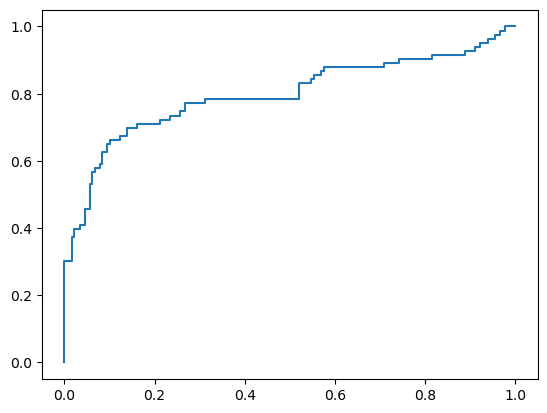

In [53]:
fpr,tpr,ther = roc_curve(Tt_test_y,pred_proba[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr,tpr)